In [2]:
from SourceCode import *

from math import e, pi
import numpy as np
import matplotlib.pyplot as plt

# № 1

$$u_{xx}+u_{yy}=-1$$
$$ u(-1,y)=u(1,y)=u(x,-1)=u(x,1)=0 $$

In [3]:
def analyt_func(x,y):
    n: int = 100
    total_s: float = 0
    for i in range(1,n,2):
        for j in range(1,n,2):
            total_s += (-1)**((i+j)//2-1)/(i*j*(i*i+j*j))*np.cos(i*pi/2*x)*np.cos(j*pi/2*y)
    total_s = total_s * (8/(pi*pi))**2
    return total_s

def left_part(main_f, test_f):
    return lambda x, y: (get_func(main_f,'deriv_x',1)(x,y)*get_func(test_f,'deriv_x',1)(x,y)
                               +  get_func(main_f,'deriv_y',1)(x,y)*get_func(test_f,'deriv_y',1)(x,y))
right_part = lambda x, y: 1
dirichle_cond = lambda x, y:  0
xl = -1
xr = 1
yl = -1
yr = 1
x_points = 50
y_points = 50
domain = Domain2DRectangle(x_points, y_points, xl, xr, yl, yr)
fem_obj = EllipticDirichletFEM(domain,
                            left_part,
                            right_part,
                            dirichle_cond)
appr_sol = fem_obj.get_solution()
x, y = domain.get_domain()
exact_sol = analyt_func(x, y)
error = inf_norm(appr_sol, exact_sol)
print(error)

count points: 2500 
count finite elements: 2401 
0.00019295515357825588


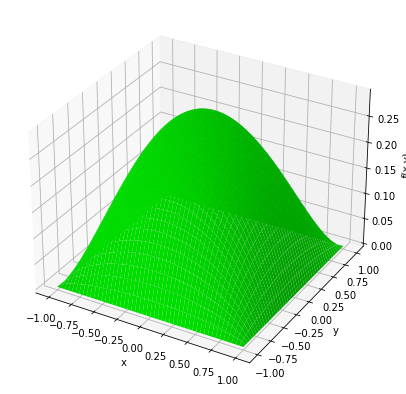

In [4]:
plot_2d_function(x, y, appr_sol)

# №2

$$ u_{xx} + u_{yy} = 0$$
$$ u(x,0)=u(0,y)=u(2,y)=0 $$
$$ u(x,2)=sin(x\frac{\pi}{2}) $$
$$ true\_sol = \frac{1}{sinh(\pi)}sinh(\pi*y/2)sin(\pi*x/2) $$

In [6]:
def dirichle_cond(x, y) -> float:
    if x == 0 or y == 0 or x == 2:
        return 0
    return np.sin(x*pi/2)

def left_part(main_f, test_f):
    return lambda x, y: (get_func(main_f,'deriv_x',1)(x,y)*get_func(test_f,'deriv_x',1)(x,y)+
                               get_func(main_f,'deriv_y',1)(x,y)*get_func(test_f,'deriv_y',1)(x,y))
right_part = lambda x, y: 0
xl = 0
xr = 2
yl = 0
yr = 2
x_points = 50
y_points = 50
domain = Domain2DRectangle(x_points, y_points, xl, xr, yl, yr)
fem_obj = EllipticDirichletFEM(domain,
                            left_part,
                            right_part,
                            dirichle_cond,
                            symmetric_problem=False)
appr_sol = fem_obj.get_solution()
analyt_func = lambda x, y: 1/np.sinh(pi)*np.sinh(pi*y/2)*np.sin(pi*x/2)
x, y = domain.get_domain()
exact_sol = analyt_func(x, y)
error = inf_norm(appr_sol, exact_sol)
print(error)

count points: 2500 
count finite elements: 2401 
0.00023758019870656621


# №3

$$ u_{xx}+0.2u_x+u=-0.2exp(-x/5)cos(x) $$
$$u(0)=0$$
$$u(1)=sin(1)exp(-0.2)$$
$$analyt\_sol=exp(-x/5)sin(x)$$

In [7]:
def left_part(main_f, test_f):
    return lambda x: (get_func(main_f,'deriv_x',1)(x)*get_func(test_f,'deriv_x',1)(x)+
                               -0.2*get_func(main_f,'deriv_x',1)(x)*get_func(test_f)(x)
                               -get_func(main_f)(x)*get_func(test_f)(x))
right_part = lambda x: 0.2*np.exp(-x/5)*np.cos(x)
dirichle_cond = lambda x: x*np.sin(1)*np.exp(-0.2)
xl = 0
xr = 1
n_points = 1000
domain = Domain1D(n_points, xl, xr)
fem_obj = EllipticDirichletFEM(domain,
                            left_part,
                            right_part,
                            dirichle_cond)
appr_sol = fem_obj.get_solution()
analyt_func = lambda x: np.exp(-x/5)*np.sin(x)
x = domain.get_domain()
exact_sol = analyt_func(x)
error = inf_norm(appr_sol, exact_sol)
print(error)


count points: 1000 
count finite elements: 999 
1.8360168108078057e-08


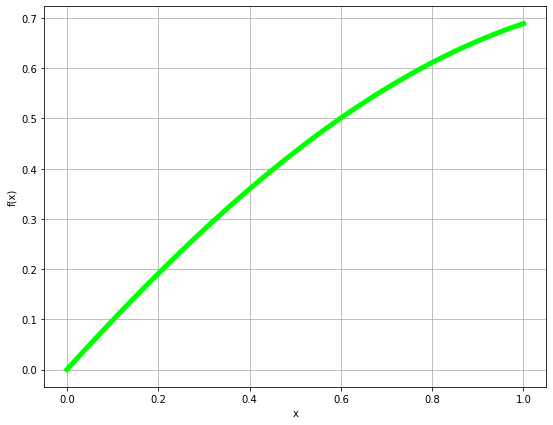

In [8]:
plot_1d_function(x, exact_sol)